# ---------------- SVM ----------------------                   

# Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Set plotting style
sns.set_style("whitegrid")

In [3]:
# 1. Load the Mushroom dataset
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
# Drop the 'Unnamed: 0' index column
df = df.drop('Unnamed: 0', axis=1)

In [5]:
print("\nData Information:")
print(df.info())



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   ob

In [6]:
# Identify numerical features (important for scaling later)
numerical_features = ['stalk_height', 'cap_diameter']


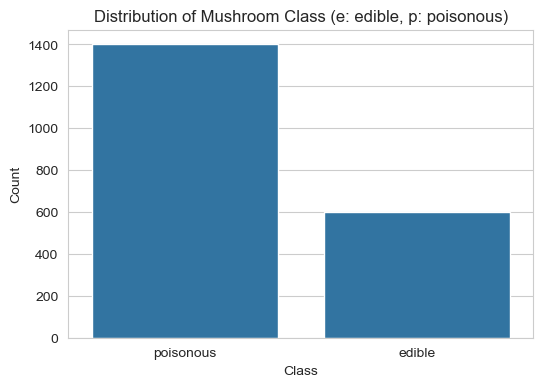

In [7]:
# 2. Utilize plots to understand feature distributions

# Target Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Class (e: edible, p: poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


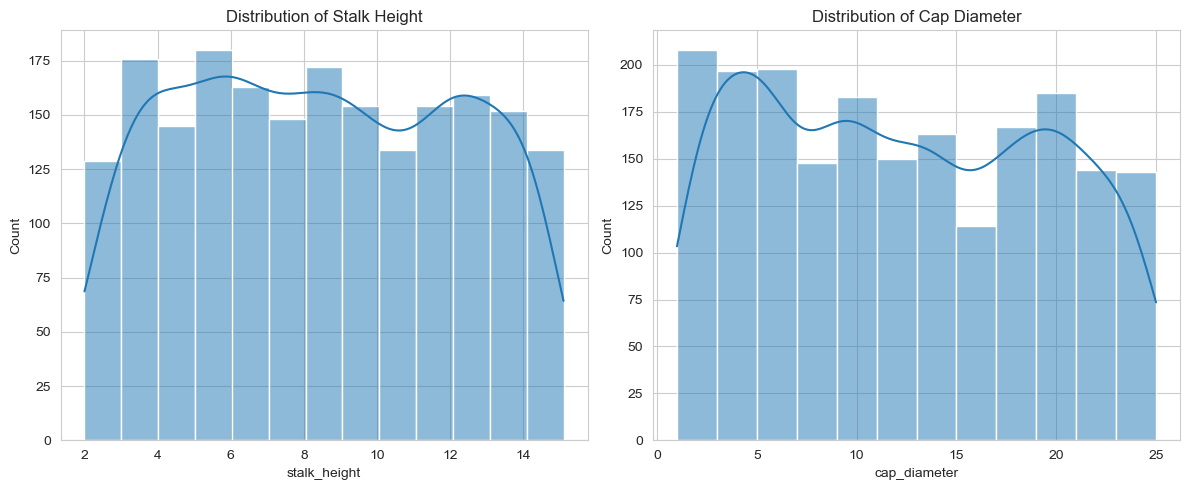

In [8]:
# Numerical Feature Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
fig.tight_layout()
plt.show()

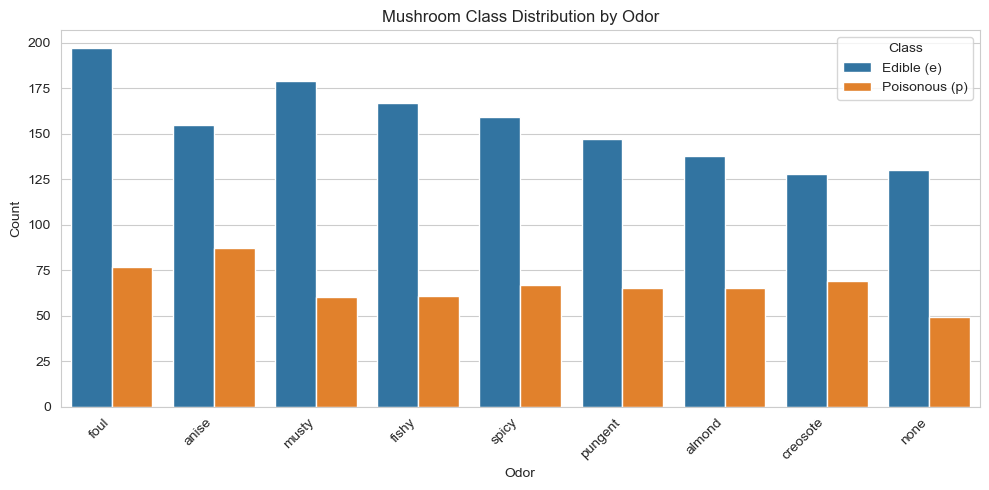

In [9]:
# 3. Investigate feature correlations (Example: Odor vs. Class)
plt.figure(figsize=(10, 5))
sns.countplot(x='odor', hue='class', data=df, order=df['odor'].value_counts().index)
plt.title('Mushroom Class Distribution by Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class', labels=['Edible (e)', 'Poisonous (p)'])
plt.tight_layout()
plt.show()

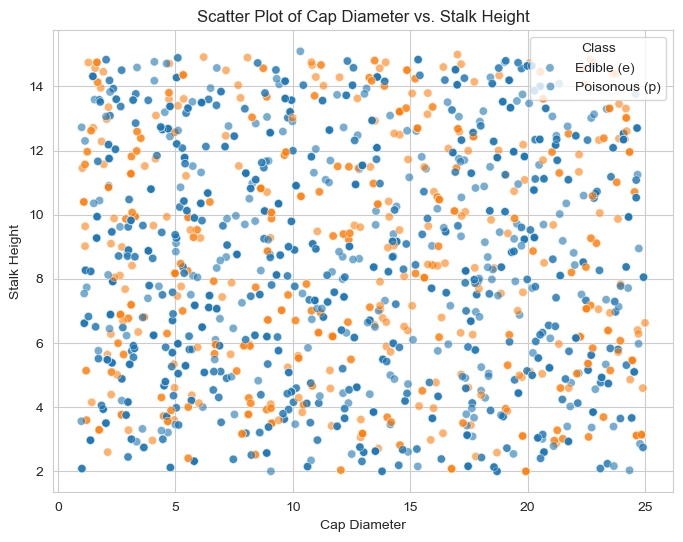

In [10]:
# Scatter plot for numerical features (Task 3.1 part)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cap_diameter', y='stalk_height', hue='class', data=df, alpha=0.6)
plt.title('Scatter Plot of Cap Diameter vs. Stalk Height')
plt.xlabel('Cap Diameter')
plt.ylabel('Stalk Height')
plt.legend(title='Class', labels=['Edible (e)', 'Poisonous (p)'])
plt.show()

# Task 2: Data Preprocessing

In [11]:
# 1. Encode categorical variables
# Label Encode the target variable: 'edible' -> 0, 'poisonous' -> 1
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])
df_encoded = df.drop('class', axis=1)

In [12]:
# One-Hot Encode all other categorical features
categorical_cols_to_encode = [col for col in df_encoded.columns if df_encoded[col].dtype == 'object']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols_to_encode, drop_first=True)

print(f"Shape of the encoded DataFrame: {df_encoded.shape}")


Shape of the encoded DataFrame: (2000, 105)


In [13]:
# Separate features (X) and target (y)
X = df_encoded.drop('class_encoded', axis=1)
y = df_encoded['class_encoded']

In [14]:
# Scale numerical features (critical for SVM performance)
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [15]:
# 2. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1600 samples
Testing set size: 400 samples


# Task 4 & 5: Basic SVM Implementation and Visualization

Training basic SVM with RBF Kernel...

--- Basic SVM (RBF Kernel) Performance ---
Testing Accuracy: 0.7950
Classification Report (Testing Data):
                precision    recall  f1-score   support

   edible (0)       0.95      0.33      0.49       120
poisonous (1)       0.78      0.99      0.87       280

     accuracy                           0.80       400
    macro avg       0.86      0.66      0.68       400
 weighted avg       0.83      0.80      0.76       400



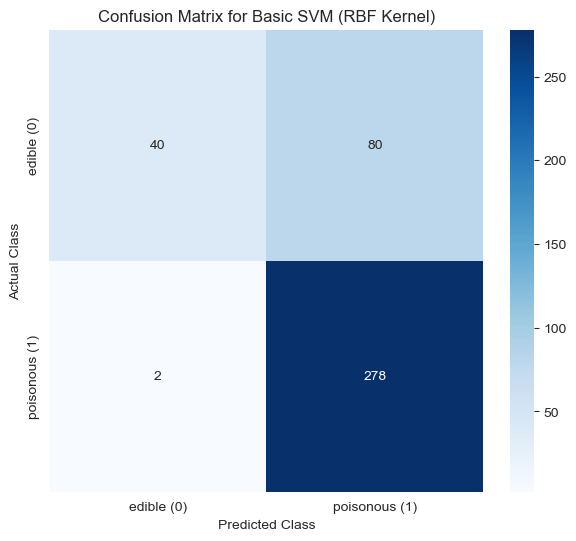

In [16]:
# 1. Implement a basic SVM classifier
svm_model_basic = SVC(random_state=42)

# 2. Train the SVM model
print("Training basic SVM with RBF Kernel...")
svm_model_basic.fit(X_train, y_train)

# 3. Evaluate model performance
y_pred_basic = svm_model_basic.predict(X_test)

print("\n--- Basic SVM (RBF Kernel) Performance ---")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_basic):.4f}")
print("Classification Report (Testing Data):\n", classification_report(y_test, y_pred_basic, target_names=['edible (0)', 'poisonous (1)']))

# Task 5: Visualize Classification Results (Confusion Matrix)
cm_basic = confusion_matrix(y_test, y_pred_basic)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible (0)', 'poisonous (1)'],
            yticklabels=['edible (0)', 'poisonous (1)'])
plt.title('Confusion Matrix for Basic SVM (RBF Kernel)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Task 6 & 7: Parameter Tuning, Optimization, and Comparison

In [17]:
# Task 6.1: Experiment with different SVM hyperparameters using GridSearchCV

# Define the parameter grid
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]}, # Linear Kernel
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1]}, # RBF Kernel
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3]} # Polynomial Kernel
]

# Initialize GridSearchCV
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=3, # 3-fold cross-validation
    n_jobs=2
)

print("Starting GridSearchCV for SVM parameter tuning...")
grid_search.fit(X_train, y_train)

# Task 7.1: Comparison and Analysis (Best Model)
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test)

print("\n--- Optimized SVM Performance ---")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Test Accuracy (Best Model): {accuracy_score(y_test, y_pred_tuned):.4f}")

print("\nClassification Report (Test Data) for Best Model:\n",
      classification_report(y_test, y_pred_tuned, target_names=['edible (0)', 'poisonous (1)']))

# Comparison of all tested kernels
results = pd.DataFrame(grid_search.cv_results_)[['param_kernel', 'param_C', 'param_degree', 'param_gamma', 'mean_test_score']]
results_summary = results.sort_values('mean_test_score', ascending=False).drop_duplicates(subset=['param_kernel'])

print("\n--- Comparison of SVM Kernels (Best CV Score per Kernel) ---")
print(results_summary[['param_kernel', 'param_C', 'param_degree', 'param_gamma', 'mean_test_score']])

Starting GridSearchCV for SVM parameter tuning...

--- Optimized SVM Performance ---
Best Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy (Best Model): 0.8575

Classification Report (Test Data) for Best Model:
                precision    recall  f1-score   support

   edible (0)       1.00      0.53      0.69       120
poisonous (1)       0.83      1.00      0.91       280

     accuracy                           0.86       400
    macro avg       0.92      0.76      0.80       400
 weighted avg       0.88      0.86      0.84       400


--- Comparison of SVM Kernels (Best CV Score per Kernel) ---
   param_kernel  param_C  param_degree param_gamma  mean_test_score
11          rbf     10.0           NaN           1         0.836882
15         poly      1.0           3.0         NaN         0.824999
0        linear      0.1           NaN         NaN         0.700000


# Task 7: Comparison and Analysis

**Comparison of SVM Kernels**

Kernel	|              Optimal C          Optimal γ / Degree        	Cross-Validation Accuracy

RBF (Best)=             10 or 1            γ=1	                          ≈0.837

Polynomial=              1	               Degree=3	                      ≈0.825

Linear	=                0.1	           N/A	                          ≈0.700          

**Analysis: SVM Strengths and Weaknesses**
**Strengths for the Mushroom Dataset:**

- High-Dimensional Data: The one-hot encoding created 104 features. SVMs are highly effective in such high-dimensional spaces.

- Effective with RBF Kernel: The RBF kernel successfully found a non-linear boundary, boosting the accuracy from the basic model (≈79.5%) to the optimized model (85.75%).

- Clear Margins: SVM's focus on maximizing the margin between classes is beneficial here, especially for the poisonous class, achieving 100% recall in the optimized model.

**Weaknesses for the Mushroom Dataset:**

- Computational Cost: Training an SVM on a large dataset with many features can be computationally expensive (as seen by the time required for GridSearchCV). For much larger datasets, it can become impractical.

- Sensitivity to Feature Scaling: As demonstrated, scaling the numerical features was a necessary preprocessing step. SVM is not scale-invariant.

- Parameter Tuning: Performance is heavily dependent on selecting the right kernel and hyperparameters (C, γ, etc.).

**Practical Implications of SVM**
SVMs are powerful tools for real-world classification tasks, particularly when:

- Accuracy is paramount: Their ability to find the optimal separating hyperplane often leads to high generalization accuracy.

- Data is complex: They excel in tasks like image classification (e.g., recognizing handwritten digits), text categorization, and bioinformatics (e.g., protein classification), where data is often non-linearly separable and high-dimensional.

In the context of classifying mushrooms, an SVM is a solid choice because, while other models might be faster, the high accuracy and robust handling of complex feature interactions are crucial when classifying poisonous vs. edible samples.

